In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import os, re, glob, cv2, numpy as np

dirs = os.listdir('/content/drive/My Drive/Augmentasi/kupu_kupu/flip/')
label = 0
im_arr = []
lb_arr = []
X = []
y = []
for i in dirs: #loop all directory
    count = 0
    for pic in glob.glob('/content/drive/My Drive/Augmentasi/kupu_kupu/flip/'+i+'/*'):
        im = cv2.imread(pic)
        im = cv2.resize(im,(224,224))
        im = np.array(im)
        count = count + 1
        X.append(im)
        y.append(label)
        if(count <= 10):
            im_arr.append({str(i):im})
    print("Jumlah "+str(i)+" : "+str(count))
    label = label + 1
    lb_arr.append(i)
X = np.array(X)
y = np.array(y);

Jumlah kupu_batik_cap : 300
Jumlah kupu_harimau_kuning_hijau : 300
Jumlah kupu_jojo : 300
Jumlah kupu_pantat_merah : 300
Jumlah kupu_hijau_biru : 300
Jumlah kupu_jarak : 300
Jumlah kupu_raja_helena : 300
Jumlah kupu_raja_limau : 300


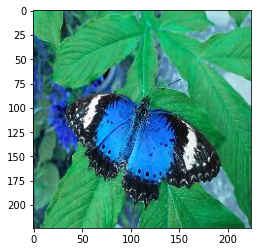

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X[1])

In [ ]:
pip install livelossplot

In [ ]:
pip install efficientnet

     |████████████████████████████████| 50 kB 3.1 MB/s 


In [ ]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras 
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
import seaborn as sns
import matplotlib.image as mpimg
from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.optimizers import SGD
from keras.layers import Dense, Flatten, GlobalMaxPooling2D, Conv2D, Dropout
from keras.callbacks import CSVLogger
from livelossplot.keras import PlotLossesCallback
import efficientnet.keras as efn

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

X_train, X_other, y_train, y_other = train_test_split(X, y, train_size=0.70, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_other, y_other, test_size=0.666, random_state=42)
X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_valid /= 255
X_test /= 255
y_train = to_categorical(y_train, len(dirs))
y_valid = to_categorical(y_valid, len(dirs))
y_test = to_categorical(y_test, len(dirs))
print("Found "+str(X_train.shape[0])+" trained image filenames belonging "+str(len(dirs))+" class")
print("Found "+str(X_valid.shape[0])+" validated image filenames belonging "+str(len(dirs))+" class")
print("Found "+str(X_test.shape[0])+" tested image filenames belonging "+str(len(dirs))+" class")

Found 1680 trained image filenames belonging 8 class
Found 240 validated image filenames belonging 8 class
Found 480 tested image filenames belonging 8 class


In [ ]:
print(lb_arr)

['kupu_batik_cap', 'kupu_harimau_kuning_hijau', 'kupu_jojo', 'kupu_pantat_merah', 'kupu_hijau_biru', 'kupu_jarak', 'kupu_raja_helena', 'kupu_raja_limau']


In [ ]:
# https://github.com/Meghashyamt/CNN-EfficientNet/blob/master/ImageClassifierCNN-EfficientNet.ipynb
# https://github.com/StefanieMueller86/ImageClassification/blob/main/CatDogClassification.ipynb

# MODEL_SUMMARY_FILE = "model_summary.txt"
# MODEL_FILE = "cats_vs_dogs.h5"

In [ ]:
IMAGE_SIZE = 224
IMAGE_WIDTH, IMAGE_HEIGHT = IMAGE_SIZE, IMAGE_SIZE

input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)

In [ ]:
# https://github.com/m-rachman/mood-detection/blob/main/face_detection.ipynb
# https://github.com/JiahaoShen0510/CNN-Food-101-Model/blob/main/CNN%20Food%20101%20Model%20EfficientNet%20B0%20.ipynb

In [ ]:
# https://github.com/mazqoty/CNN_CIFAR100/blob/main/CNN_CIFAR-100_Kaggle_v13.ipynb

from keras.applications.efficientnet import preprocess_input
import tensorflow as tf
# tf.random.set_seed(365)

model = Sequential()
efficient_net = tf.keras.applications.EfficientNetB4(weights='imagenet', include_top=False, input_shape=input_shape)
# efficient_net = efn.EfficientNetB7(weights='imagenet', include_top=False, input_shape=input_shape, classes = 8)

# for index, layer in enumerate(efficient_net.layers):
#     if index < 761:
#         layer.trainable = False
# 
#     print(index)
#     print(layer)

model.add(efficient_net)
model.add(GlobalMaxPooling2D())
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(8, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

print(model.summary())

# with open(MODEL_SUMMARY_FILE,"w") as fh:
#     model.summary(print_fn=lambda line: fh.write(line + "\n"))

71696384/71686520 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb4 (Functional)  (None, 7, 7, 1792)       17673823  
                                                                 
 global_max_pooling2d (Globa  (None, 1792)             0         
 lMaxPooling2D)                                                  
                                                                 
 dropout (Dropout)           (None, 1792)              0         
                                                                 
 flatten (Flatten)           (None, 1792)              0         
                                                                 
 dense (Dense)               (None, 8)                 14344     
                                                                 
Total params: 17,688,167
Trainable params: 17,562,960
Non

In [ ]:
# https://github.com/baotramduong/Brain-Tumor-Classification-with-Efficient-Net-and-Grad-CAM-Visualization/blob/main/Notebook.ipynb
# Training

from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.datasets import mnist

# MODEL_DIR = "/content/drive/My Drive/Efficient_Aug/temp"

# if not os.path.exists(MODEL_DIR):  #If the directory does not exist, create it.
#     os.makedirs(MODEL_DIR)
# checkpoint = ModelCheckpoint(filepath = os.path.join(MODEL_DIR, "model-{epoch:02d}.h5"),
#                              monitor='val_accuracy',
#                              save_best_only=True,
#                              mode='auto',
#                              verbose=1)
# 
#reduce learning rate
# reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', 
#                               factor = 0.3, 
#                               patience = 2, 
#                               min_delta = 0.001,
#                               mode='auto',
#                               verbose=1)
# 
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, 
                    batch_size=32)
#                    , callbacks=[checkpoint, reduce_lr])

scores = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

# model.save_weights(MODEL_FILE)

Epoch 1/10
53/53 [==============================] - 120s 2s/step - loss: 2.9035 - accuracy: 0.5202 - val_loss: 8.3000 - val_accuracy: 0.1375
Epoch 2/10
53/53 [==============================] - 79s 2s/step - loss: 0.4021 - accuracy: 0.8881 - val_loss: 6.3972 - val_accuracy: 0.1375
Epoch 3/10
53/53 [==============================] - 80s 2s/step - loss: 0.1770 - accuracy: 0.9554 - val_loss: 6.6283 - val_accuracy: 0.1604
Epoch 4/10
53/53 [==============================] - 80s 2s/step - loss: 0.0578 - accuracy: 0.9804 - val_loss: 6.2243 - val_accuracy: 0.1729
Epoch 5/10
53/53 [==============================] - 80s 2s/step - loss: 0.0516 - accuracy: 0.9869 - val_loss: 5.1886 - val_accuracy: 0.1708
Epoch 6/10
53/53 [==============================] - 79s 1s/step - loss: 0.0343 - accuracy: 0.9881 - val_loss: 3.6869 - val_accuracy: 0.3229
Epoch 7/10
53/53 [==============================] - 80s 2s/step - loss: 0.0393 - accuracy: 0.9881 - val_loss: 2.6009 - val_accuracy: 0.4042
Epoch 8/10
53/53 [=

In [ ]:
# model_json=model.to_json()
# with open("/content/drive/My Drive/Efficient_Aug/temp/model.json","w") as file:
#     file.write(model_json)
# model.save_weights("/content/drive/My Drive/Efficient_Aug/temp/my_model.h5")
# print("Model berhasil disimpan !! ")

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Model berhasil disimpan !! 


In [ ]:
# from tensorflow.keras.models import model_from_json
# json_file = open('/content/drive/My Drive/Efficient_Aug/temp/model.json','r')
# loaded_model_json = json_file.read()
# json_file.close()
# 
# load_model = model_from_json(loaded_model_json)
# load_model.load_weights("/content/drive/My Drive/Efficient_Aug/temp/my_model.h5")
# 
# print("Loadded!")

Loadded!


In [ ]:
# load_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb7 (Functional)  (None, 7, 7, 2560)       64097687  
                                                                 
 global_max_pooling2d (Globa  (None, 2560)             0         
 lMaxPooling2D)                                                  
                                                                 
 dropout (Dropout)           (None, 2560)              0         
                                                                 
 flatten (Flatten)           (None, 2560)              0         
                                                                 
 dense (Dense)               (None, 8)                 20488     
                                                                 
Total params: 64,118,175
Trainable params: 63,807,448
Non-trainable params: 310,727
______________________________________

In [ ]:
# Evaluate accuracy
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=1)

print('\nTest accuracy:', test_acc)

15/15 [==============================] - 5s 316ms/step - loss: 0.4793 - accuracy: 0.8562

Test accuracy: 0.856249988079071


In [ ]:
train_loss, train_acc = model.evaluate(X_train,  y_train, verbose=1)

print('\nTrain accuracy:', train_acc)

53/53 [==============================] - 21s 318ms/step - loss: 0.4377 - accuracy: 0.8690

Train accuracy: 0.8690476417541504


In [ ]:
# # Testing
# probabilities = model.predict_generator(test_generator, TEST_SIZE)
# for index, probability in enumerate(probabilities):
#     image_path = test_data_dir + "/" +test_generator.filenames[index]
#     img = mpimg.imread(image_path)
#     plt.imshow(img)
#     if probability > 0.5:
#         plt.title("%.2f" % (probability[0]*100) + "% dog")
#     else:
#         plt.title("%.2f" % ((1-probability[0])*100) + "% cat")
#     plt.show()

In [ ]:
#Graph drawing
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

<Figure size 432x288 with 0 Axes>

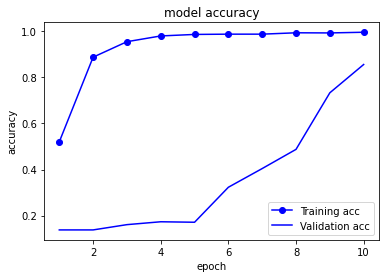

In [ ]:
plot_epochs = range(1, len(acc)+1)
# Accuracy
plt.plot(plot_epochs, acc, 'bo-', label='Training acc')
plt.plot(plot_epochs, val_acc, 'b', label='Validation acc')
plt.title('model accuracy')
plt.ylabel('accuracy')  #Y-axis label
plt.xlabel('epoch')  #X-axis label
plt.legend()
plt.show()

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

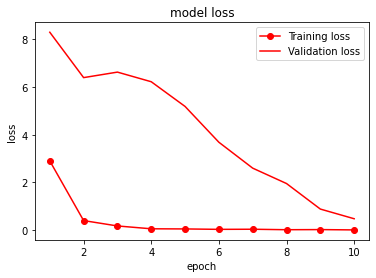

In [ ]:
plot_epochs = range(1, len(loss)+1)
# Accuracy
plt.plot(plot_epochs, loss, 'ro-', label='Training loss')
plt.plot(plot_epochs, val_loss, 'r', label='Validation loss')
plt.title('model loss')
plt.ylabel('loss')  #Y-axis label
plt.xlabel('epoch')  #X-axis label
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_prediction_n = []
y_test_n = []
for i in range(0, len(y_pred)):
  max_n = max(y_pred[i])
  max_m = max(y_test[i])
  index_n = [index_n for index_n, j in enumerate(y_pred[i]) if j == max_n]
  index_m = [index_m for index_m, j in enumerate(y_test[i]) if j == max_m]
  y_prediction_n.append(index_n)
  y_test_n.append(index_m)

In [ ]:
print(classification_report(y_test_n, y_prediction_n, 
                            target_names=["kupu_harimau_kuning_hijau",
                                          "kupu_raja_helena",
                                          "kupu_hijau_biru",
                                          "kupu_batik_cap",
                                          "kupu_jarak",
                                          "kupu_raja_limau",
                                          "kupu_jojo",
                                          "kupu_pantat_merah"]))

                           precision    recall  f1-score   support

kupu_harimau_kuning_hijau       0.97      0.48      0.64        65
         kupu_raja_helena       1.00      0.83      0.90        63
          kupu_hijau_biru       0.84      0.91      0.87        56
           kupu_batik_cap       0.91      0.95      0.93        56
               kupu_jarak       0.74      0.98      0.84        66
          kupu_raja_limau       1.00      0.84      0.91        63
                kupu_jojo       0.88      0.96      0.92        47
        kupu_pantat_merah       0.72      0.95      0.82        64

                 accuracy                           0.86       480
                macro avg       0.88      0.86      0.86       480
             weighted avg       0.88      0.86      0.85       480



In [ ]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_pred

array([2, 1, 6, 7, 4, 2, 3, 7, 5, 3, 7, 1, 3, 4, 5, 6, 3, 7, 0, 4, 0, 6,
       3, 0, 1, 2, 7, 5, 2, 1, 4, 4, 6, 6, 4, 6, 1, 1, 6, 3, 3, 4, 3, 1,
       2, 7, 0, 6, 4, 7, 4, 6, 7, 4, 3, 4, 1, 7, 1, 5, 7, 5, 2, 7, 1, 4,
       4, 2, 1, 1, 3, 4, 2, 5, 6, 2, 3, 4, 7, 7, 4, 6, 5, 1, 3, 5, 3, 5,
       4, 7, 0, 7, 0, 6, 1, 7, 7, 2, 4, 4, 7, 7, 5, 4, 1, 7, 4, 0, 3, 2,
       3, 4, 4, 4, 4, 1, 4, 2, 5, 5, 3, 0, 2, 0, 3, 4, 7, 5, 5, 4, 6, 7,
       3, 4, 0, 3, 6, 4, 4, 2, 6, 5, 7, 4, 4, 4, 5, 4, 7, 0, 6, 7, 4, 4,
       7, 0, 4, 5, 2, 4, 6, 5, 6, 6, 2, 6, 1, 5, 4, 5, 3, 1, 7, 6, 3, 1,
       7, 6, 7, 7, 7, 2, 7, 1, 1, 7, 4, 4, 2, 3, 4, 2, 7, 4, 0, 3, 0, 2,
       0, 4, 4, 5, 5, 4, 6, 2, 0, 3, 3, 4, 7, 5, 0, 4, 2, 1, 3, 2, 1, 3,
       4, 7, 2, 5, 2, 0, 7, 4, 6, 2, 4, 7, 1, 1, 5, 5, 4, 2, 5, 5, 2, 4,
       3, 1, 2, 7, 7, 5, 4, 7, 4, 2, 6, 7, 7, 2, 1, 4, 7, 2, 6, 7, 3, 3,
       1, 3, 1, 3, 7, 2, 2, 4, 1, 2, 5, 0, 0, 5, 4, 7, 4, 7, 5, 2, 6, 5,
       4, 7, 3, 0, 7, 5, 1, 4, 7, 7, 6, 2, 4, 4, 1,

In [ ]:
y_test_class = np.argmax(y_test, axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sn
print(accuracy_score(y_test_class, y_pred))
confusion_matrix(y_test_class, y_pred)

0.85625


array([[31,  0,  4,  0, 15,  0,  5, 10],
       [ 1, 52,  0,  2,  0,  0,  0,  8],
       [ 0,  0, 51,  2,  3,  0,  0,  0],
       [ 0,  0,  0, 53,  0,  0,  0,  3],
       [ 0,  0,  0,  0, 65,  0,  1,  0],
       [ 0,  0,  4,  0,  5, 53,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 45,  2],
       [ 0,  0,  2,  1,  0,  0,  0, 61]])

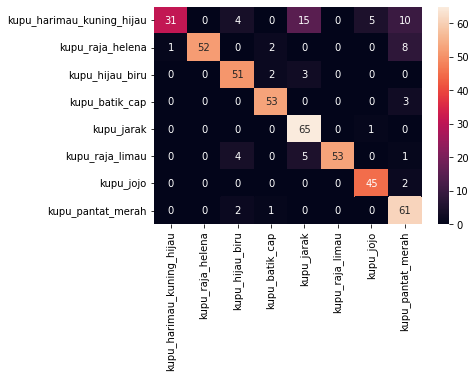

In [ ]:
cm = confusion_matrix(y_test_class, y_pred)
sn.heatmap(cm, annot=True, xticklabels=["kupu_harimau_kuning_hijau",
                                          "kupu_raja_helena",
                                          "kupu_hijau_biru",
                                          "kupu_batik_cap",
                                          "kupu_jarak",
                                          "kupu_raja_limau",
                                          "kupu_jojo",
                                          "kupu_pantat_merah"], 
           yticklabels=["kupu_harimau_kuning_hijau",
                                          "kupu_raja_helena",
                                          "kupu_hijau_biru",
                                          "kupu_batik_cap",
                                          "kupu_jarak",
                                          "kupu_raja_limau",
                                          "kupu_jojo",
                                          "kupu_pantat_merah"])